# Comparing coverage from head tissue illumina data vs thorax tissue ONT data

### Trying to filter out non-bee contigs.


In [38]:
oblob <- read.table("/workspace/hraijc/Bee/BeeT/Assemblies/blobplots/FLYE10.blobplot.FLYE10.blobplot.blobDB.table.txt", header = T)
iblob <- read.table("/workspace/hraijc/Bee/BeeT/Assemblies/blobplots/BeeT_FLYE10_NIFRLiF61.blobplot.BeeT_FLYE10_NIFRLiF61.blobplot.blobDB.table.txt", header = T)

In [24]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [40]:
head(oblob)

,name,length,GC,N,bam0,phylum.t.6.s,phylum.s.7.s,phylum.c.8
,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<int>
1,contig_100,721,0.4716,0,4.0906,no-hit,0,0
2,contig_1001,1816918,0.3508,0,14.3868,Arthropoda,3572,0
3,contig_1005,2696791,0.3255,0,15.3196,Arthropoda,1650,0
4,contig_1012,5364037,0.3622,0,15.7284,Arthropoda,2302,0
5,contig_1015,1940,0.4613,0,22.8038,no-hit,0,0
6,contig_1016,1047,0.4613,0,8.4507,no-hit,0,0


In [48]:
blob <- full_join(oblob, iblob, by="name") %>% 
rename("obam0"="bam0.x","ibam0"="bam0.y")


In [49]:
head(blob)

,name,length.x,GC.x,N.x,obam0,phylum.t.6.s.x,phylum.s.7.s.x,phylum.c.8.x,length.y,GC.y,N.y,ibam0,phylum.t.6.s.y,phylum.s.7.s.y,phylum.c.8.y
,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<int>
1,contig_100,721,0.4716,0,4.0906,no-hit,0,0,721,0.4716,0,0.0000,no-hit,0,0
2,contig_1001,1816918,0.3508,0,14.3868,Arthropoda,3572,0,1816918,0.3508,0,2.7045,Arthropoda,3572,0
3,contig_1005,2696791,0.3255,0,15.3196,Arthropoda,1650,0,2696791,0.3255,0,2.6741,Arthropoda,1650,0
4,contig_1012,5364037,0.3622,0,15.7284,Arthropoda,2302,0,5364037,0.3622,0,2.7509,Arthropoda,2302,0
5,contig_1015,1940,0.4613,0,22.8038,no-hit,0,0,1940,0.4613,0,3.1261,no-hit,0,0
6,contig_1016,1047,0.4613,0,8.4507,no-hit,0,0,1047,0.4613,0,1.2715,no-hit,0,0


## Comparing coverage of read used to make genome assembly from head tisue (ibam) to thorax tissue (obam)

Warning message:
"Removed 76 rows containing missing values (geom_point)."


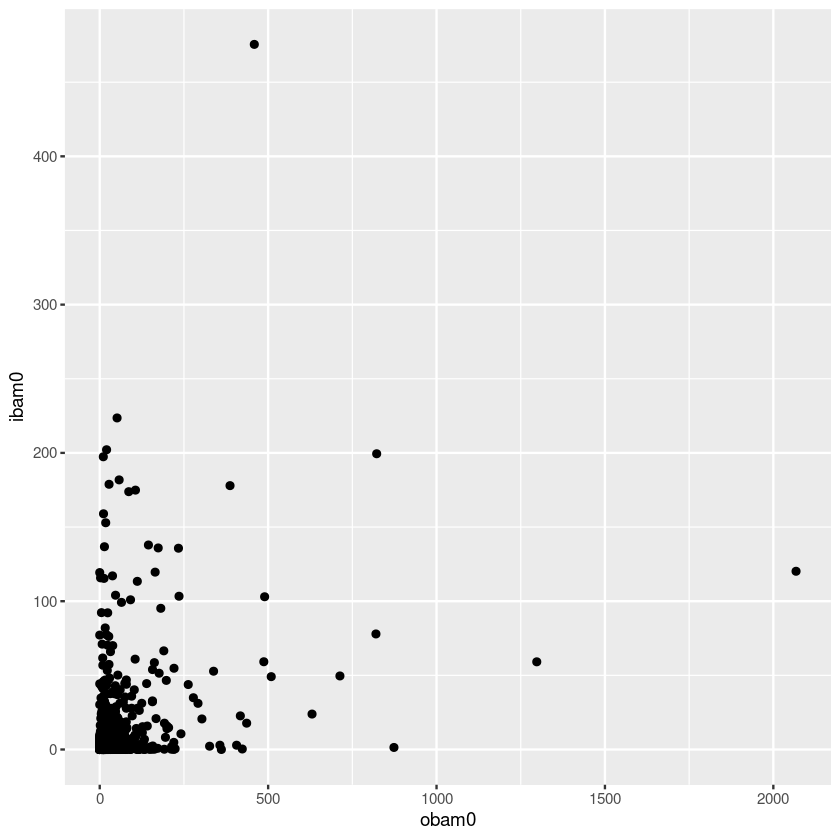

Warning message:
"Removed 76 rows containing non-finite values (stat_binhex)."
Warning message:
"Removed 28 rows containing missing values (geom_hex)."


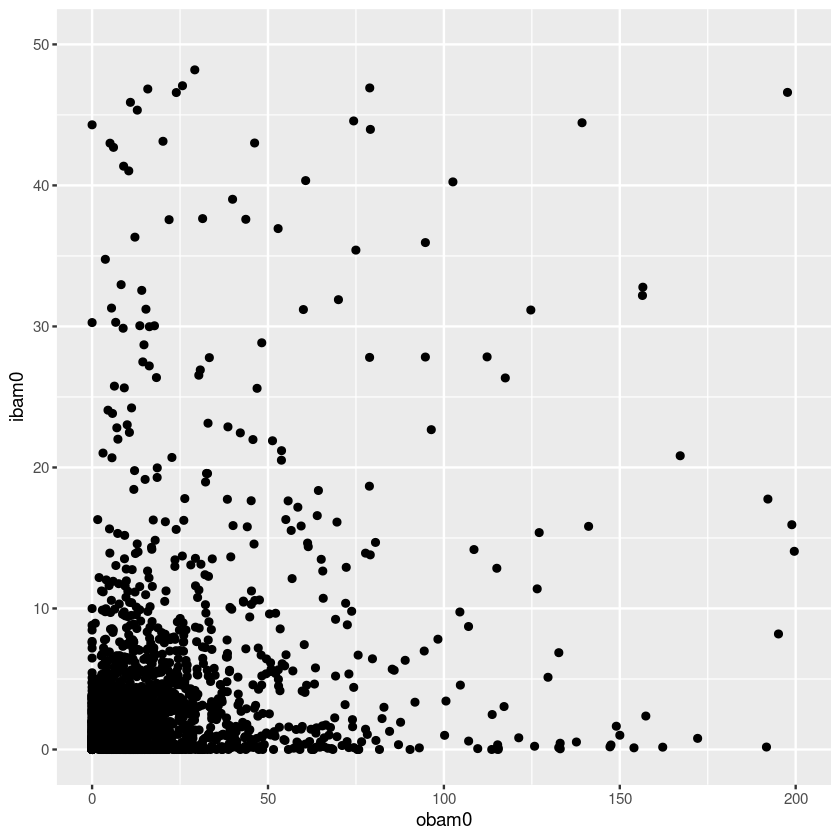

Warning message:
"Removed 808 rows containing non-finite values (stat_density2d)."


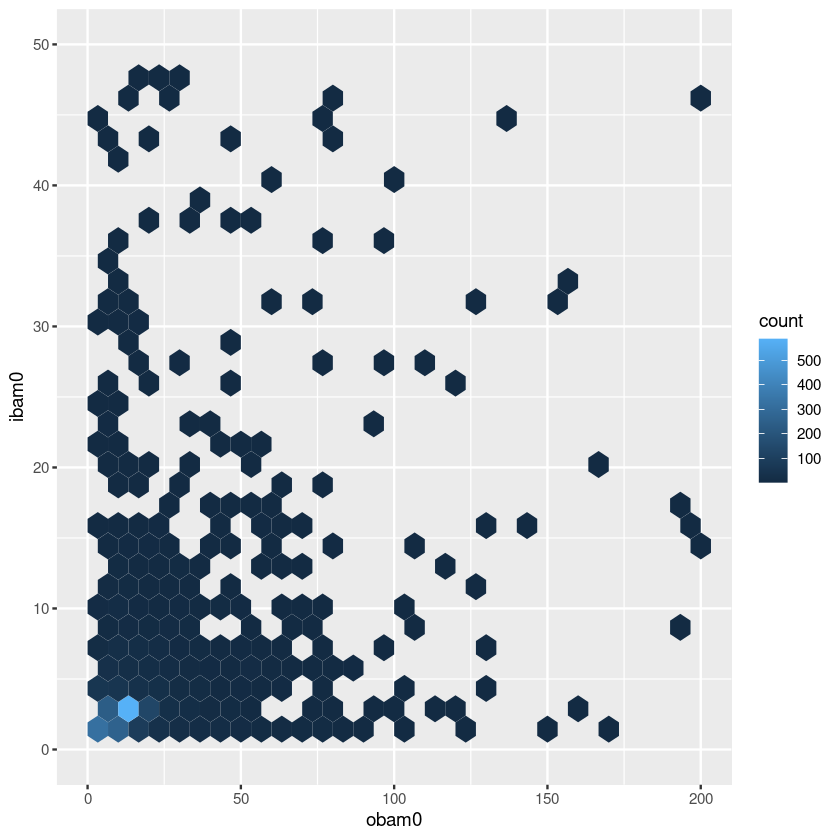

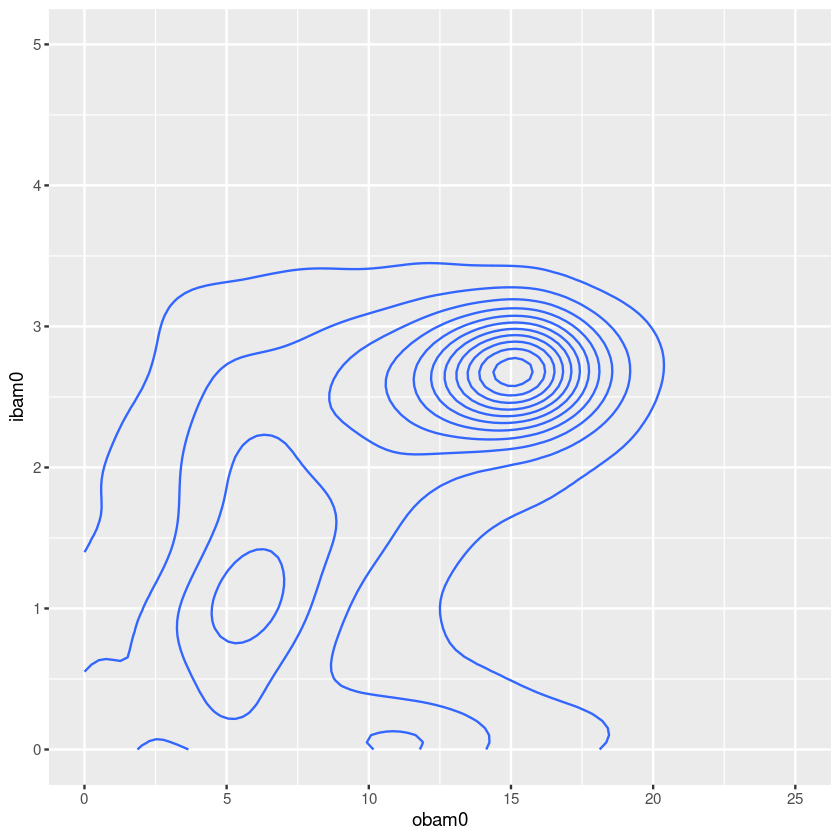

In [47]:
e <- ggplot(blob,aes(obam0,ibam0))
e + geom_point()
e + geom_point() + ylim(0,50) + xlim(0,200)
e + geom_hex()+ ylim(0,50) + xlim(0,200)
e + geom_density2d()+ ylim(0,5) + xlim(0,25)

Warning message:
"Removed 125 rows containing non-finite values (stat_density)."


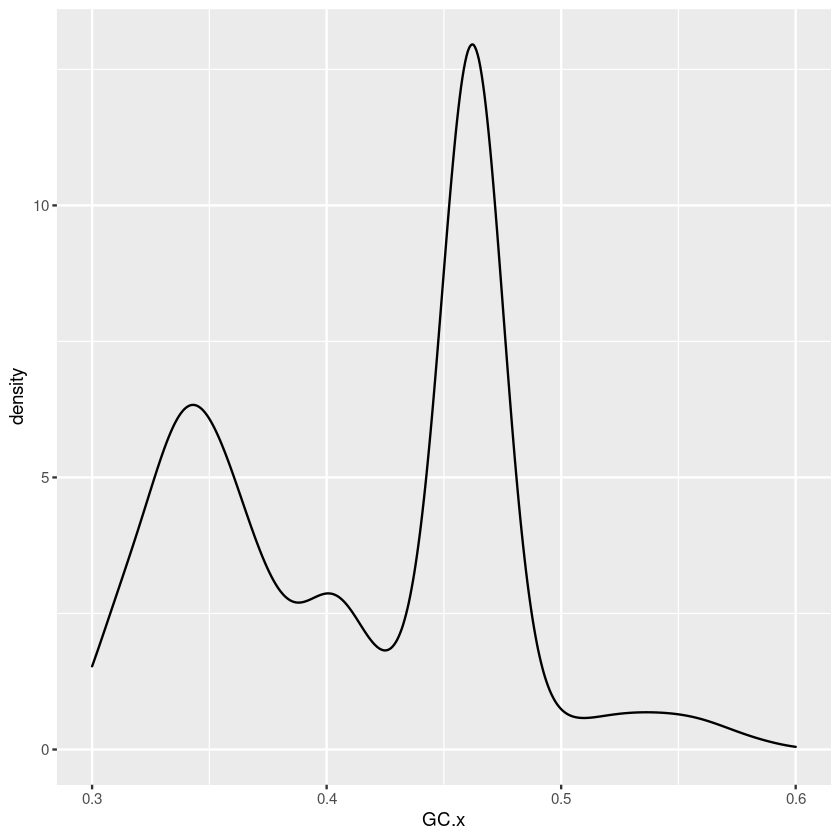

In [60]:
#GC Content distribution
c <- ggplot(blob,aes(GC.x))
c+ geom_density(kernel="gaussian") + xlim(.3,.6)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1124 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


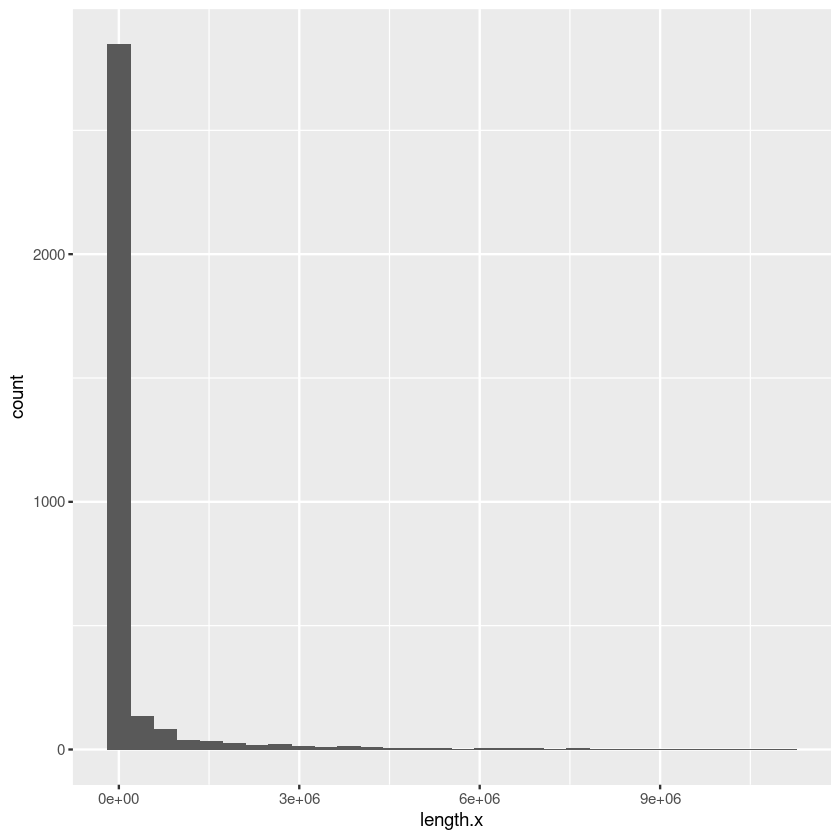

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 2140 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


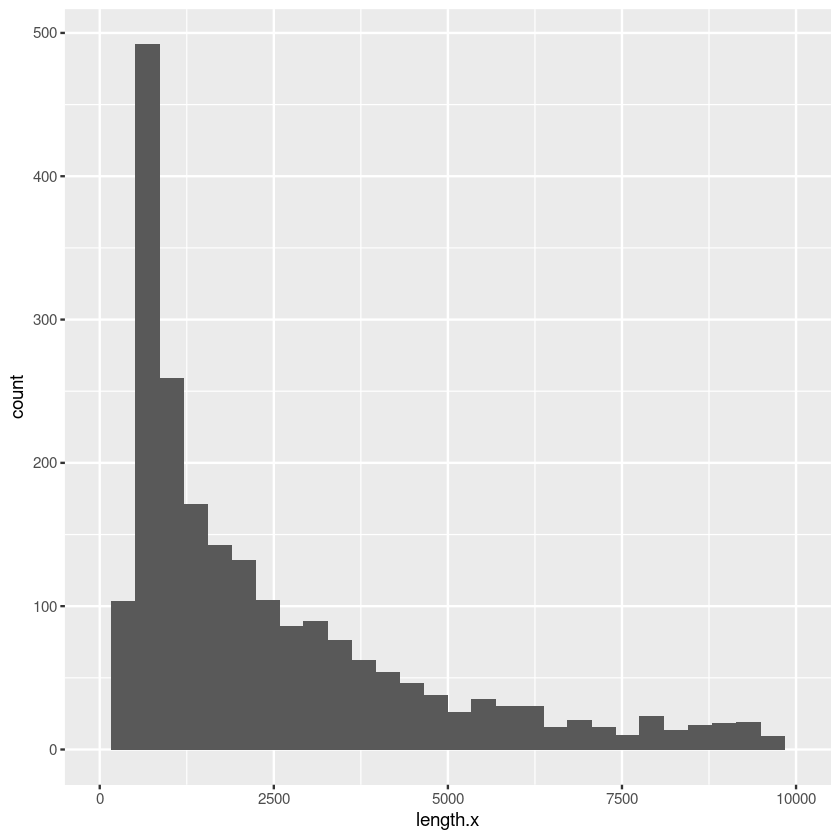

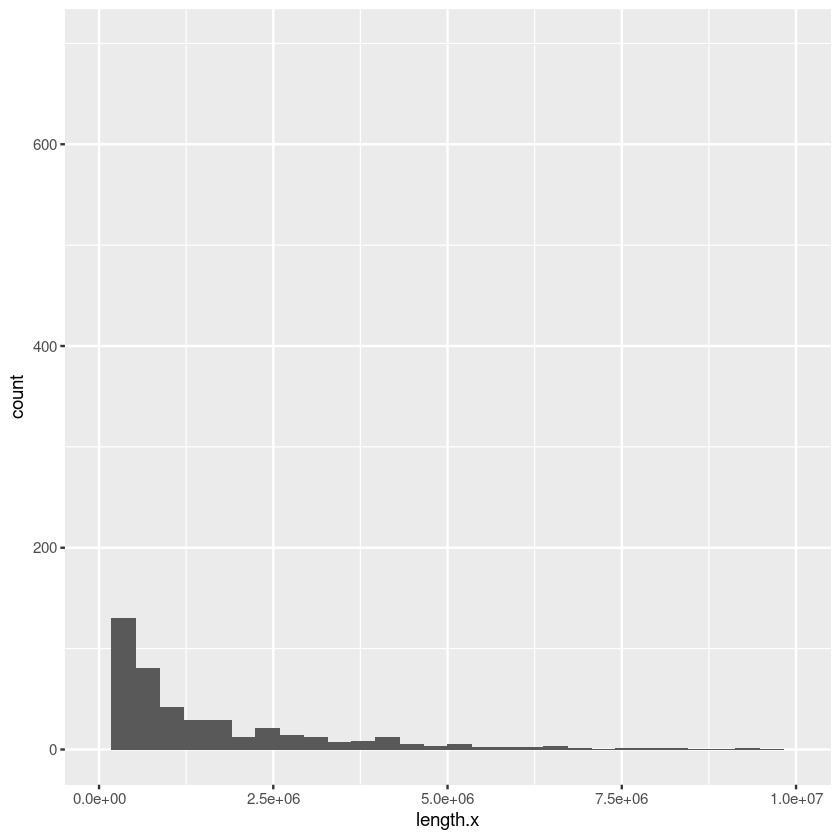

In [72]:
#Contig Length distribution
c <- ggplot(blob,aes(length.x))
c+ geom_histogram()
c+ geom_histogram() + xlim(0,10000)
c+ geom_histogram() + xlim(10000,10000000)

In [73]:
#Testing cutoffs:
#Order
#1) keep all "Arthropoda" hits
#2) of the rest remove icov < 2
#3) GC > 0.4
#4) len < 5000

In [75]:
Arthro_blob <- blob %>%
filter(phylum.t.6.s.x=="Arthropoda")

In [86]:
blob_nonArthro_keep <- blob %>%
filter(phylum.t.6.s.x!="Arthropoda") %>%
filter(ibam0 >= 2) %>%
filter(GC.x <= 0.4) %>%
filter(length.x >= 5000)

In [93]:
nrow(blob)
nrow(Arthro_blob)
nrow(blob_nonArthro_keep)
keep.names <- c(Arthro_blob$name,blob_nonArthro_keep$name)

[1] 3262

[1] 656

[1] 165

In [94]:
length(keep.names)

[1] 821

In [95]:
656+165

[1] 821

In [97]:
write(keep.names, file="/workspace/hraijc/Bee/BeeT/Assemblies/blobplots/Flye10.keep.txt")